In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [73]:
df = pd.read_csv('dl senti.csv', encoding='ISO-8859-1')  
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text) 
    text = text.lower()  
    return text
df['Cleaned_Text'] = df['Text'].apply(clean_text)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 0.4111 - loss: 1.0919 - val_accuracy: 0.0000e+00 - val_loss: 1.1237
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4111 - loss: 1.0999 - val_accuracy: 0.0000e+00 - val_loss: 1.1229
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2333 - loss: 1.0987 - val_accuracy: 0.0000e+00 - val_loss: 1.1219
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3556 - loss: 1.0953 - val_accuracy: 0.0000e+00 - val_loss: 1.1204
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6222 - loss: 1.0426 - val_accuracy: 0.0000e+00 - val_loss: 1.1190
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5889 - loss: 1.0275 - val_accuracy: 0.0000e+00 - val_loss: 1.1185
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 1.0249 - val_accuracy: 0.2500 - val_loss: 1.1184
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4111 - loss: 1.0673 - val_accuracy: 0

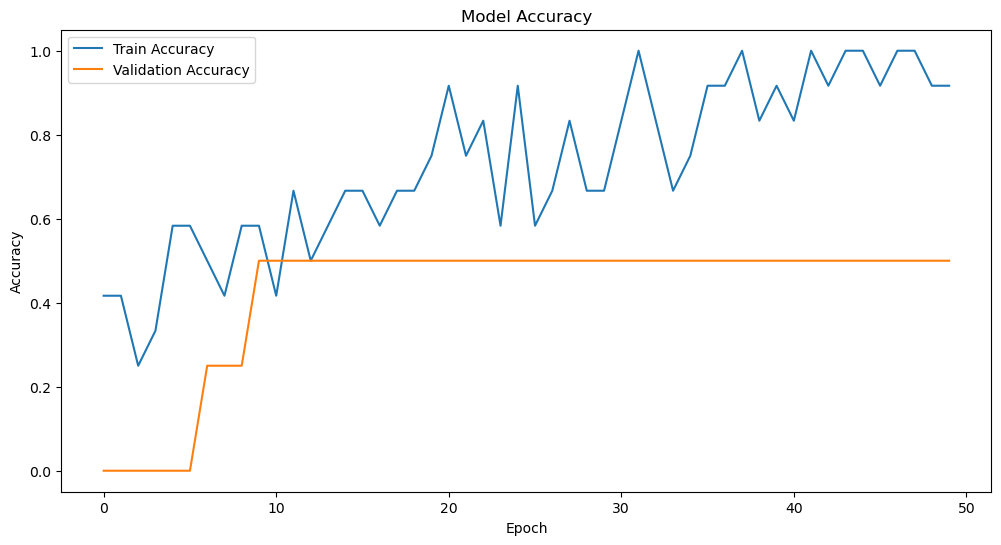

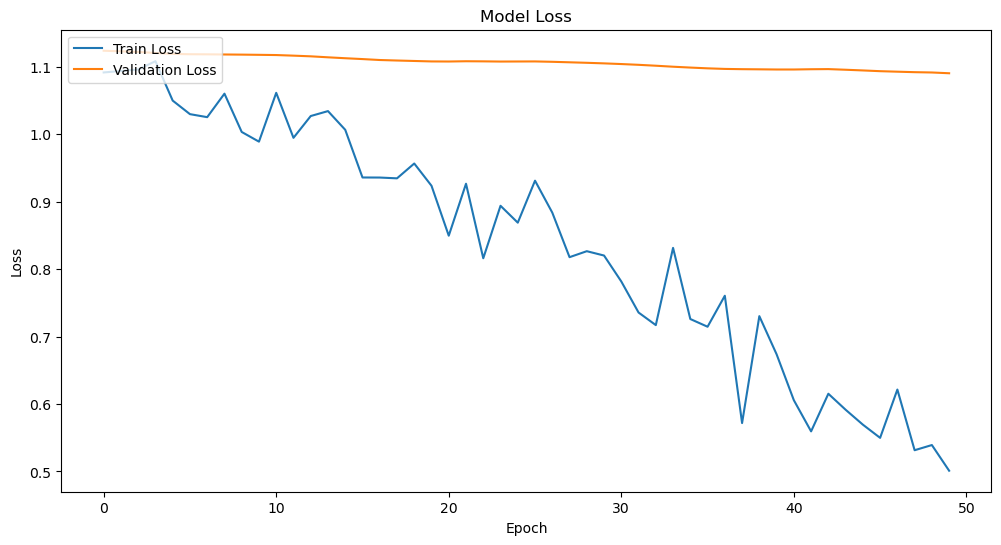

In [75]:

label_encoder = LabelEncoder()
df['Encoded_Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Text'], df['Encoded_Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)  
X_train_vectorized = vectorizer.fit_transform(X_train).toarray()
X_test_vectorized = vectorizer.transform(X_test).toarray()

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_vectorized.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_vectorized, y_train, epochs=50, batch_size=10, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_vectorized, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

def predict_sentiment(text):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text]).toarray()
    prediction = model.predict(vectorized_text)
    return label_encoder.inverse_transform([prediction.argmax()])[0]



In [65]:
new_text = input("Enter the text from dataset")
print(f'Sentiment: {predict_sentiment(new_text)}')

Enter the text from dataset I absolutely love this product!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Sentiment: positive


In [67]:
new_text = input("Enter the text from dataset")
print(f'Sentiment: {predict_sentiment(new_text)}')

Enter the text from dataset This is the worst service I've ever had.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Sentiment: positive


In [69]:
new_text = input("Enter the text from dataset")
print(f'Sentiment: {predict_sentiment(new_text)}')

Enter the text from dataset It's okay, nothing special.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Sentiment: neutral
